In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy.stats import shapiro, ttest_1samp
import joblib
from sklearn.metrics import root_mean_squared_error, r2_score
import shap

In [ ]:
from scipy.optimize import root
# import the trained ML model
load_model = joblib.load('model_HAF.pkl')

# import test datset and external validation datasets
test_data = pd.read_csv('Test dataset.csv')
external_data = pd.read_csv('complete external data.csv')

# performance of the models
test_prediction = load_model.predict(test_data.drop(columns =['Canonical SMILES', 'Value']))
test_r2 = r2_score(test_data['Value'].values, test_prediction)
test_rmse = root_mean_squared_error(test_data['Value'].values, test_prediction)

print(f'Test R2: {test_r2} | and RMSE: {test_rmse}')

#external validation
prediction = load_model.predict(external_data.drop(columns = ['Canonical SMILES', 'actual']))
r2 = r2_score(external_data['actual'].values, prediction)
rmse = root_mean_squared_error(external_data['actual'].values, prediction)

print(f'External validation R2: {r2} | and RMSE: {rmse}')

Test R2: 0.8652533934506684 | and RMSE: 0.43331230575717294
External validation R2: 0.7224411675708992 | and RMSE: 0.8309648789819585


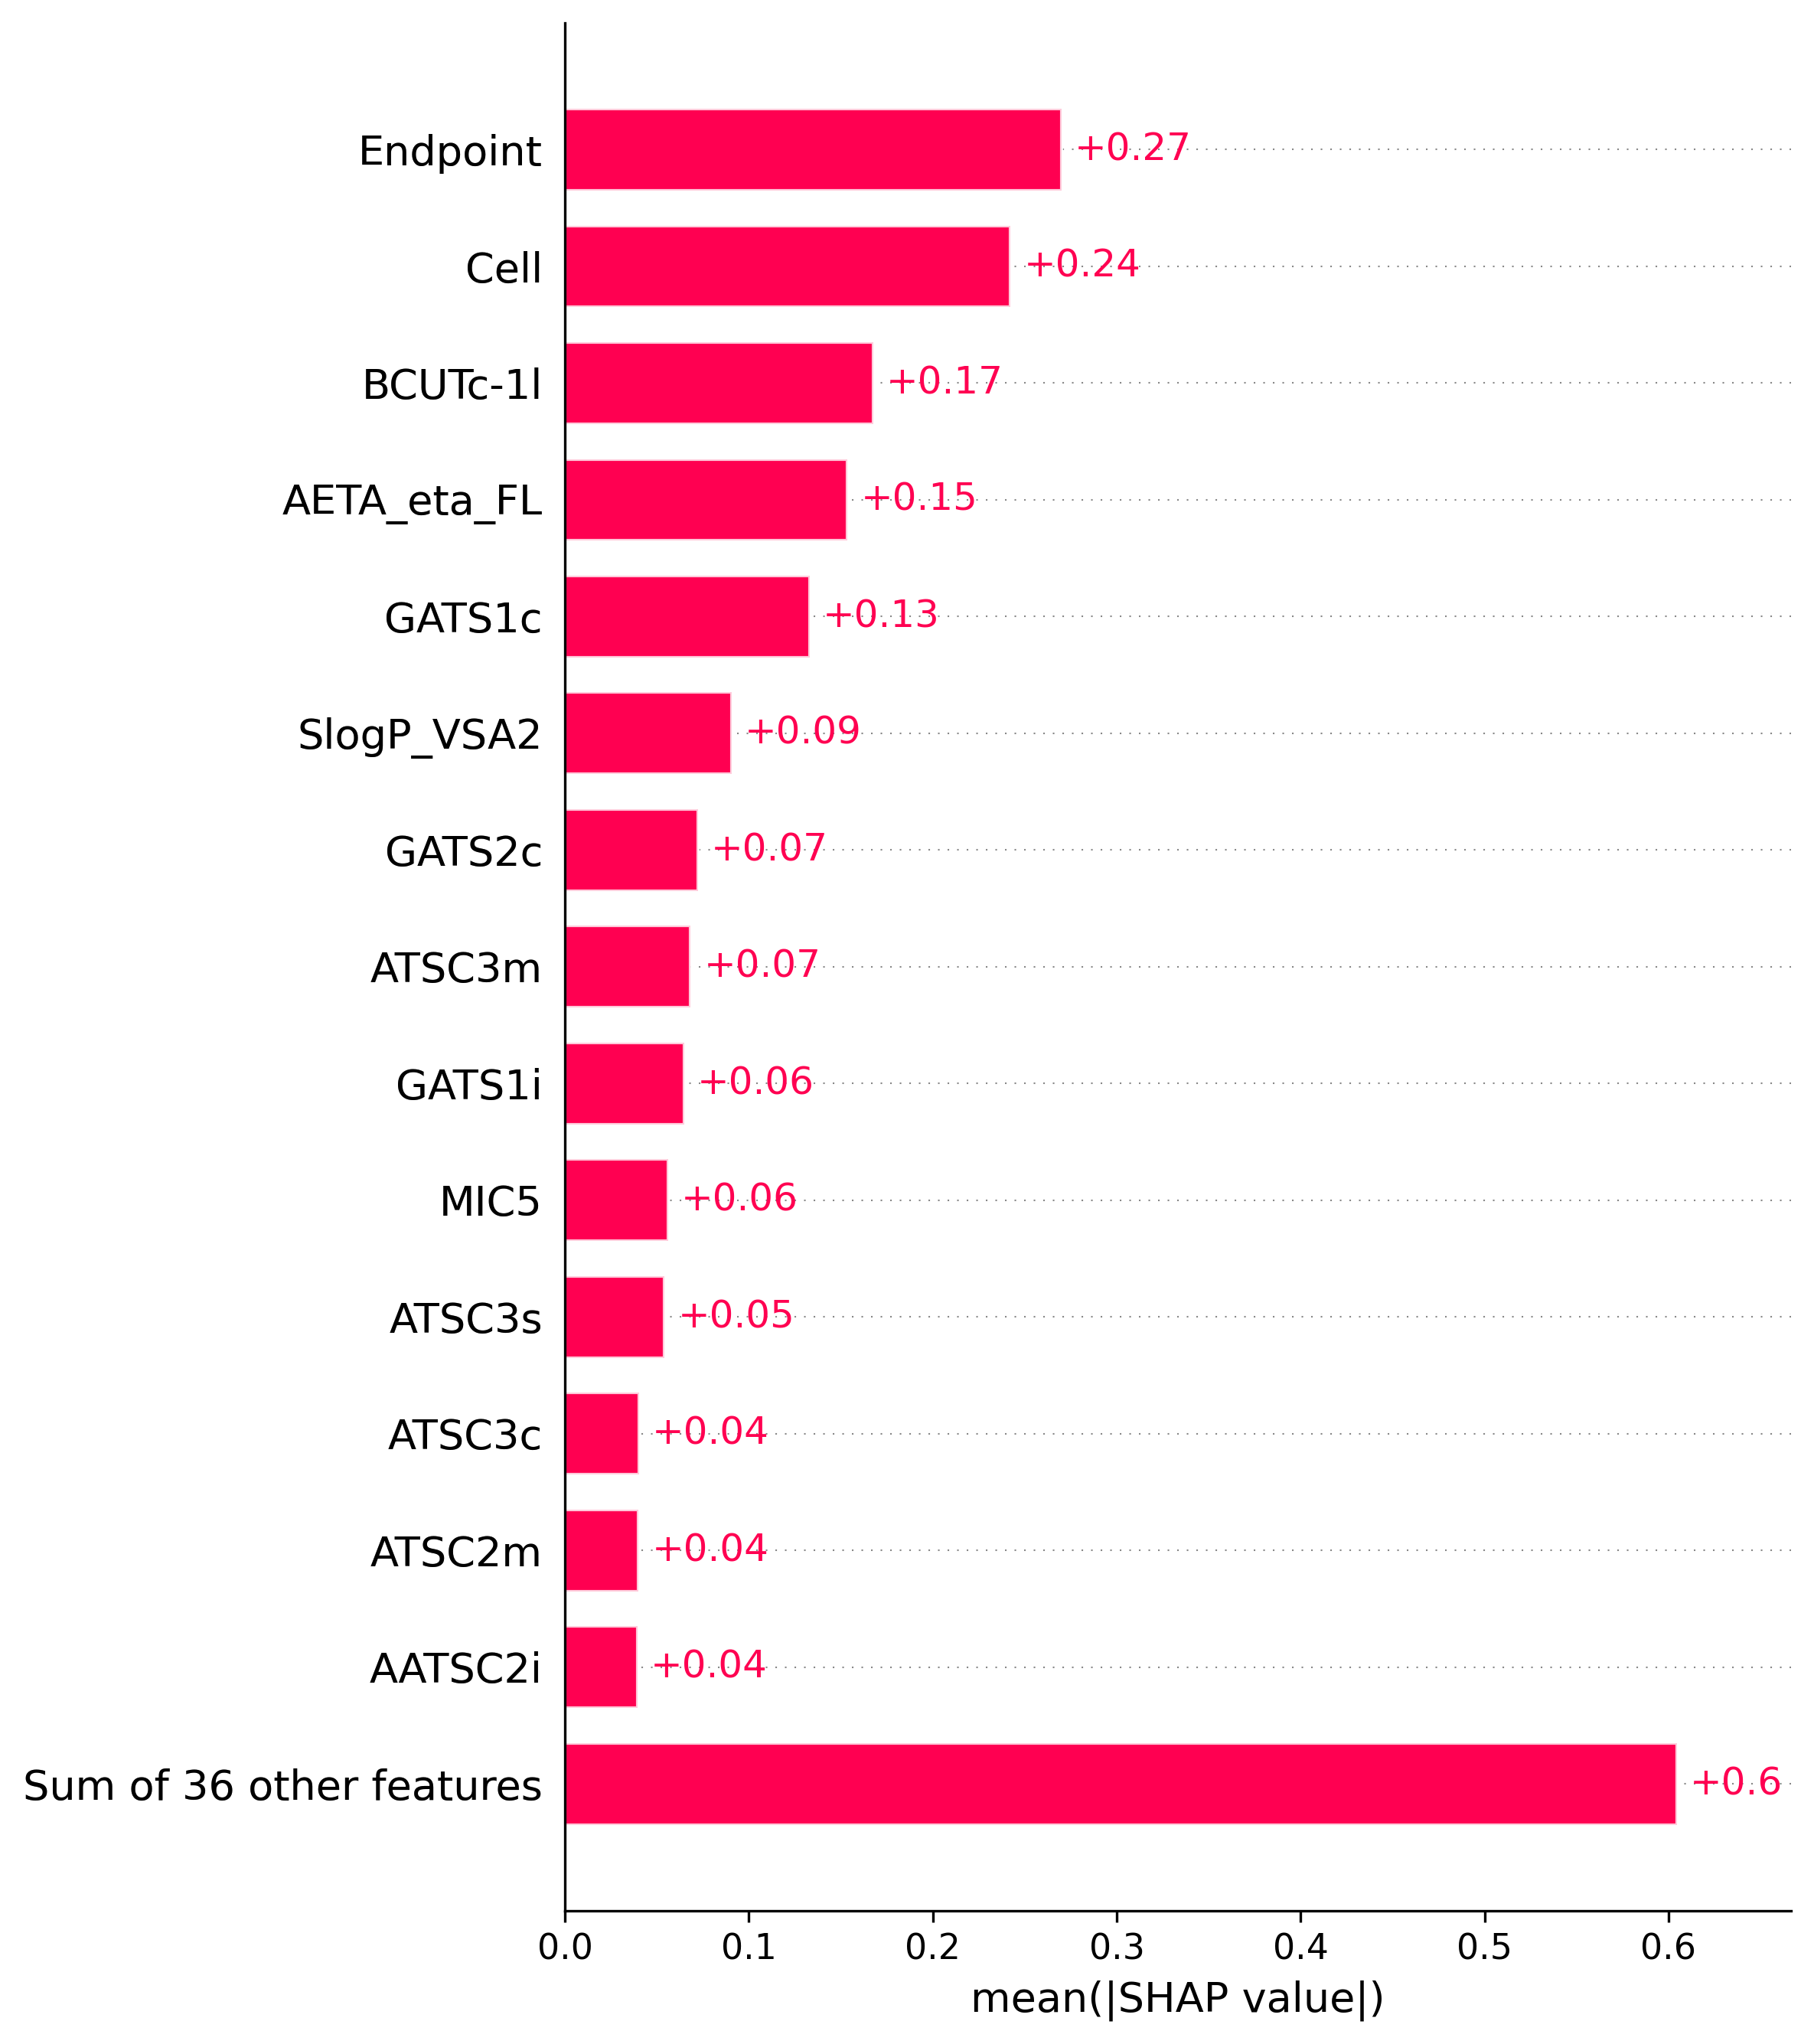

In [ ]:
train_data = pd.read_csv('training data.csv')
Xtrain = train_data.drop(columns = ['Canonical SMILES', 'Value'])

explainer = shap.TreeExplainer(load_model, Xtrain)

# Compute SHAP values for training data
shap_values = explainer(Xtrain)

# Plot beeswarm (for single output model)

plt.figure(figsize=(5, 4), dpi=300)  # smaller and sharper figure
shap.plots.bar(
    shap_values,
    max_display=15,  # top 15 features
    show=False
)

plt.tight_layout()
plt.savefig('shap plot.png', dpi = 1500)
plt.show()